# Лабораторная работа №3

## Метод сеток решения одномерного нестационарного уравнения теплопроводности

### Задание №1 (Задача 2)

**Промоделировать стационарные процессы теплопроводности стержня в зависимости от входных данных задачи – переменного коэффициента теплопроводности k(x) и плотности источников тепла f(x):**

$$\begin{cases} 
   -\frac {d}{dx} (k(x) \cdot \frac {du}{dx}) = f, \\
   u(a) = U_a, u(b) = U_b
\end{cases}$$  

где $f(x) = c \cdot \delta \cdot (x - x_0)$, $\delta(x)$ == дельта-функция.

##### Используем интегрального уравнения баланса, которое на любом отрезке $[x_1, x_2]$, принадлежащем $[a, b]$ имеет вид:  

$$W(x_1) - W(x_2) - \int_{x_1}^{x^2}q(x) \cdot u(x) dx + \int_{x_1}^{x_2} f(x) dx = 0.$$ 

Здесь $W(x) = -k(x) \cdot \frac {du}{dx}$. — плотность потока тепла

А также промежуточные (потоковые) узлы:

$$
x_{n+-0.5} = x_n +- 0.5h
$$
первый интеграл опущен
$$
W_{n-0.5} - W_{n+0.5} + \int_{x_{n-0.5}}^{x_{n+0.5}} f(x)dx = 0. 
$$

**Тогда можно применить следующие формулы для решения уравнения:**

$\begin{cases} 
   \frac {1}{h} \cdot (b_n \cdot \frac {u_{n+1} - u_n}{h} - a_n \cdot \frac {u_n - u_{n-1}}{h}) - d_n \cdot u_n = - \varphi_n,  n = 1, 2, ..., N - 1, \\
   u_0 = U_a, u_N = U_b
\end{cases}$

**Окончательная формула**
$$
 \frac{a_n}{h^2} u_{n-1} - \frac{a_n + b_n}{h^2} u_{n} + \frac{b_n}{h^2} u_{n+1} = -\varphi_n
$$

**Формулы для нахождения коэфицентов:**

$a_n = \frac {h}{\int_{x_n-1}^{x_n} \frac {dx}{k(x)}},$

$b_n = \frac {h}{\int_{x_n+1}^{x_n} \frac {dx}{k(x)}},$

$d_n = \frac {1}{h} \cdot \int_{x_n-0.5}^{x_n+0.5} q(x)dx,$  В условии задачи $q(x) = 0$ => $d_n = 0$

$\varphi_n = \frac {1}{h} \cdot \int_{x_n-0.5}^{x_n+0.5} f(x)dx.$

##### Исходные данные для задачи

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad  # Интегрирование на интервале

f_option = 0  # Выбранный вариант функции f 
k_option = 0  # Выбранный вариант коэфицента теплопроводности k
a, b = 1, 2
h = (b - a) / 150
ua = 3
ub = 3

##### Функции и лямбды для вычисления коэфициентов

In [2]:
k_inverse = lambda x: 1 / k(x)  # Используется для вычисления коэфицентов a & b
# Параметры x1, x2 задают область интегрирования
a_b = lambda x1, x2: h * 1 / quad(k_inverse, x1, x2)[0]  # Общая формула для нахождения коэфициентов a & b


# Функция для получения коэфициента тепло проводности для разных вариантов задания
def k(x):
    if k_option == 0:  # стержень состоит из двуx материалов, k1 << k2
        if x < (a + b) / 2:
            return 0.001  # k1
        else:
            return 10000  # k2

    elif k_option == 1:  # стержень состоит из двуx материалов, k1 >> k2
        if x <= (a + b) / 2:
            return 10000  # k1
        else:
            return 0.001  # k2

    elif k_option == 2:  # стержень состоит из треx материалов, k1 < k2 < k3
        if x <= a + (b - a) / 3:
            return 100       # k1
        elif x >= a + 2 * (b - a) / 3:
            return 300       # k3
        else:
            return 200       # k2

    elif k_option == 3:  # стержень состоит из треx материалов, k1 > k2 > k3
        if x <= a + (b - a) / 3:
            return 300       # k1
        elif x >= a + 2 * (b - a) / 3:
            return 100       # k3
        else:
            return 200       # k2

    elif k_option == 4:  # стержень состоит из треx материалов, k1 = k, k2 = 2k, k3 = k
        if x <= a + (b - a) / 3:
            return 10       # k1
        elif x >= a + 2 * (b - a) / 3:
            return 10       # k3
        else:
            return 20       # k2

    elif k_option == 5:  # стержень состоит из треx материалов, k1 = 20k, k2 = k, k3 = 20k
        if x <= a + (b - a) / 3:
            return 200      # k1
        elif x >= a + 2 * (b - a) / 3:
            return 200      # k3
        else:
            return 10       # k2


def f(option: int = 0):
    # точечный источник поставлен в середину отрезка [a,b]
    if option == 0:
        return np.array([a + (b - a) / 2])
    # два одинаковых по мощности источника поставлены в разные точки отрезка, симметричные относительно середины отрезка
    elif option == 1:
        return np.array([a + 3 * (b - a) / 4,  a + (b - a) / 4])
    # два различных по мощности источника поставлены симметрично
    elif option == 2:
        return np.array([a + 3 * (b - a) / 4, a + (b - a) / 4])
    # свой вариант расположения источников
    elif option == 3:
        return np.array([a + (b - a) / 4])


# Значение fi с учётом дельто функции
def fi(x, option: int = 0):  # option - нужный вариант f
    x_f_array = f(option)
    if option == 2:
        if x - h / 2 <= x_f_array[0] <= x + h / 2:
            return 1 / h * 10
        elif x - h / 2 <= x_f_array[1] <= x + h / 2:
            return 1 / h * 20
        else:
            return 0
    else:
        if any([x - h / 2 <= x_i <= x + h / 2 for x_i in x_f_array]):
            return 1 / h * 10
        else:
            return 0

##### Функция для составления и решения системы

In [3]:
def solve(option_k, option_f):
    global k_option, f_option
    k_option = option_k
    f_option = option_f
    n = round((b - a) / h)
    X = np.arange(a, b + h, h)
    vector = np.linspace(1, 1, n - 1)
    matrix = np.zeros((n - 1, n - 1))

    for i in range(n - 1):
        vector[i] *= -fi(X[i + 1], f_option)
    vector[0] -= ua * a_b(X[0], X[1]) / h ** 2
    vector[n - 2] -= ub * a_b(X[n - 1], X[n]) / h ** 2

    for i in range(1, n - 2):
        matrix[i][i - 1] = a_b(X[i], X[i + 1]) / h ** 2
        # Если бы q != 0 то + d(X[i + 1])
        matrix[i][i] = -a_b(X[i + 1], X[i + 2]) / h ** 2 - a_b(X[i], X[i + 1]) / h ** 2
        matrix[i][i + 1] = a_b(X[i + 1], X[i + 2]) / h ** 2

    i = 0
    matrix[i][i] = -a_b(X[i + 1], X[i + 2]) / h ** 2 - a_b(X[i], X[i + 1]) / h ** 2
    matrix[i][i + 1] = a_b(X[i + 1], X[i + 2]) / h ** 2

    i = n - 2
    matrix[i][i - 1] = a_b(X[i], X[i + 1]) / h ** 2
    matrix[i][i] = -a_b(X[i + 1], X[i + 2]) / h ** 2 - a_b(X[i], X[i + 1]) / h ** 2

    return np.linalg.solve(matrix, vector), X[1:-1]

### Выполнение задания в зависимости от исходных данных:

#### 1. От коэффициента теплопроводности:

* **Стержень состоит из двух материалов с различными коэффициентами теплопроводности (k).**

**a) k1 << k2**

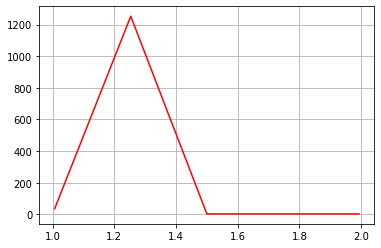

In [4]:
    Y, X = solve(option_k=0, option_f=1)
    plt.grid(True)
    plt.plot(X, Y, color='red')
    plt.show()

**б) k1 << k2**

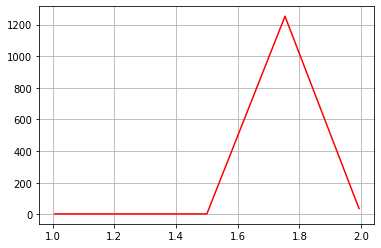

In [5]:
    Y, X = solve(option_k=1, option_f=1)
    plt.grid(True)
    plt.plot(X, Y, color='red')
    plt.show()

* **Стержень состоит из трех материалов с различными коэффициентами теплопроводности.**

**a) k1 < k2 < k3**

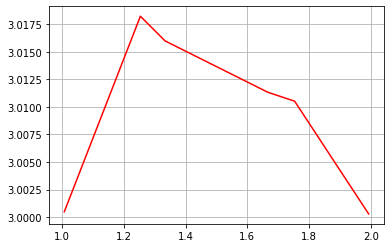

In [6]:
    Y, X = solve(option_k=2, option_f=1)
    plt.grid(True)
    plt.plot(X, Y, color='red')
    plt.show()

**б) k1 > k2 > k3**

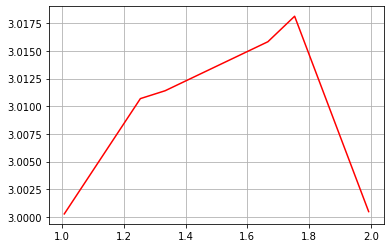

In [7]:
    Y, X = solve(option_k=3, option_f=1)
    plt.grid(True)
    plt.plot(X, Y, color='red')
    plt.show()

**в) k1 = k,  k2 = 2k, k3 = k**

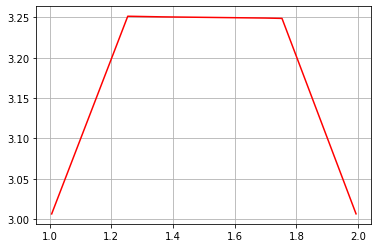

In [8]:
    Y, X = solve(option_k=4, option_f=1)
    plt.grid(True)
    plt.plot(X, Y, color='red')
    plt.show()

**г) k1 = 20k, k2 = k, k3 = 20k**

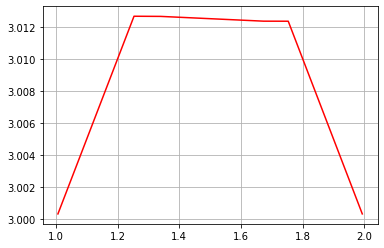

In [9]:
    Y, X = solve(option_k=5, option_f=1)
    plt.grid(True)
    plt.plot(X, Y, color='red')
    plt.show()

#### 2. От функции f(x):

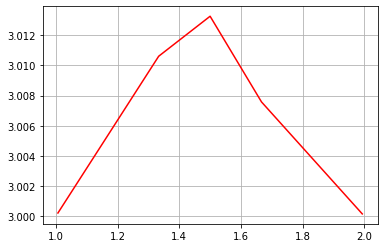

In [10]:
    Y, X = solve(option_k=2, option_f=0)
    plt.grid(True)
    plt.plot(X, Y, color='red')
    plt.show()

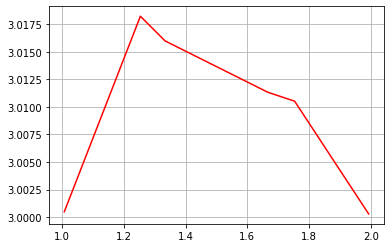

In [11]:
    Y, X = solve(option_k=2, option_f=1)
    plt.grid(True)
    plt.plot(X, Y, color='red')
    plt.show()

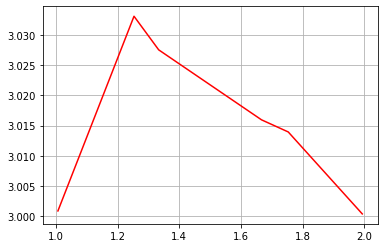

In [12]:
    Y, X = solve(option_k=2, option_f=2)
    plt.grid(True)
    plt.plot(X, Y, color='red')
    plt.show()

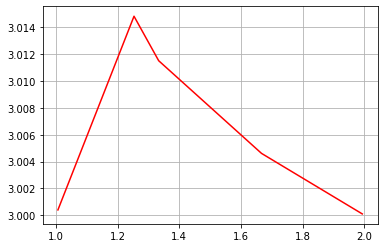

In [13]:
    Y, X = solve(option_k=2, option_f=3)
    plt.grid(True)
    plt.plot(X, Y, color='red')
    plt.show()

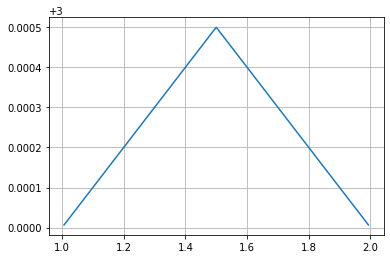

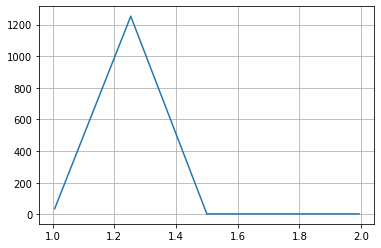

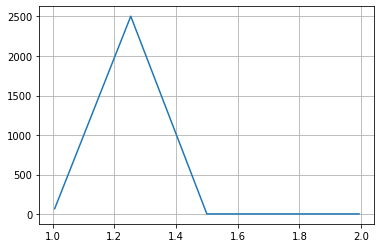

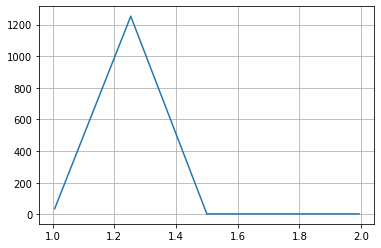

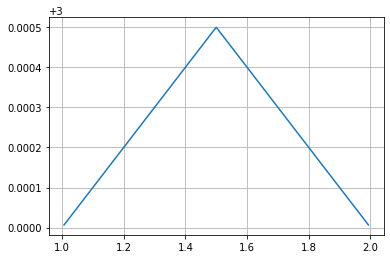

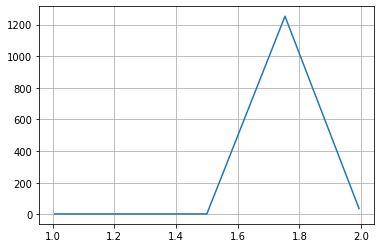

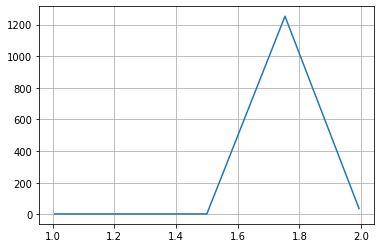

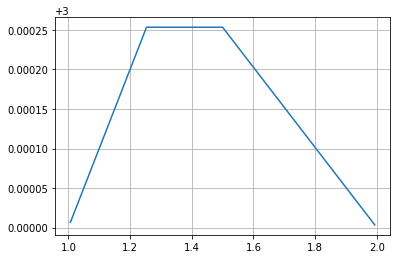

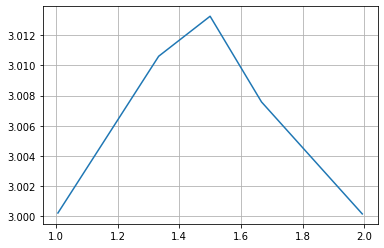

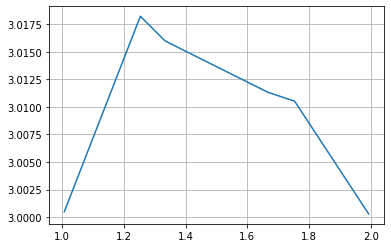

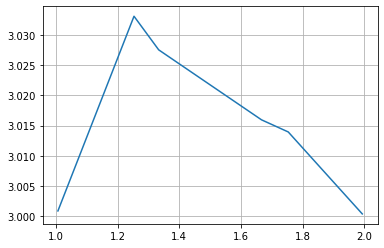

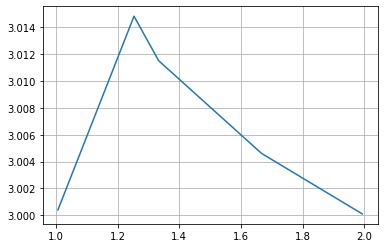

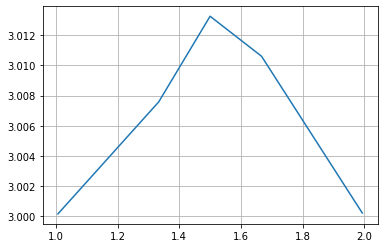

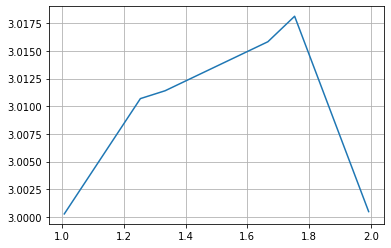

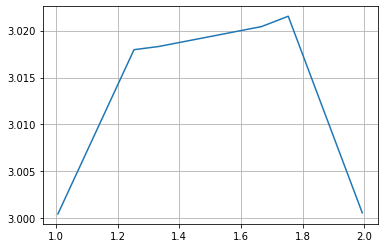

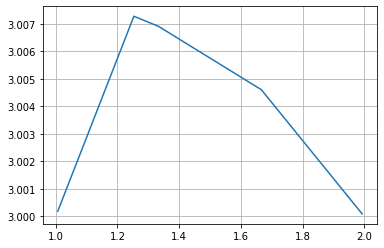

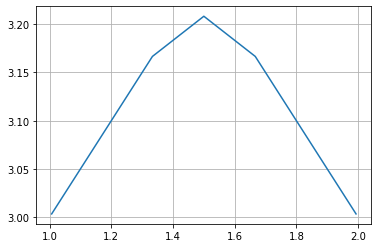

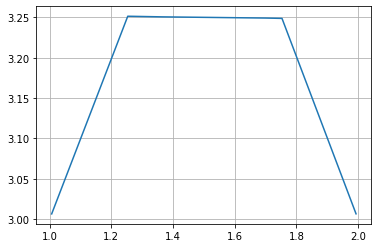

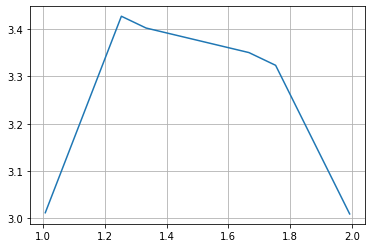

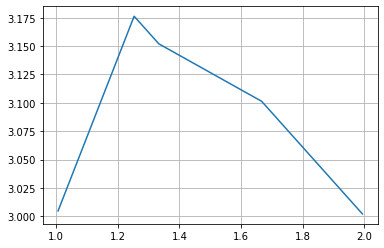

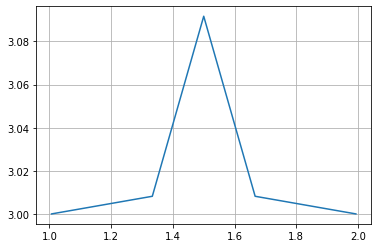

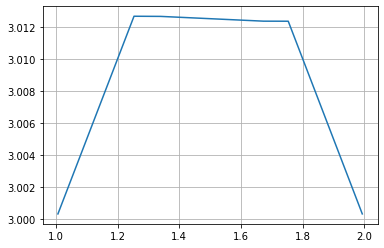

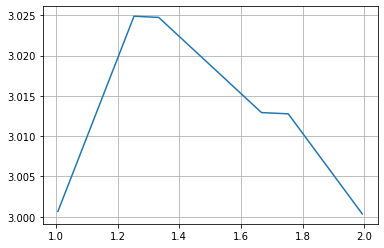

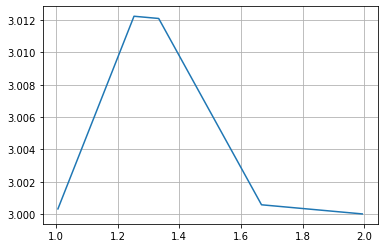

In [14]:
for i in range(6):
    for j in range(4):
        Y, X = solve(option_k=i, option_f=j)
        plt.grid(True)
        plt.plot(X, Y)
        plt.show()

### Задание №2 (Задача 3)

**Промоделировать нестационарные процессы теплопроводности в зависимости от входных данных задачи − коэффициента теплопроводности и начальной температуры:**

$$\begin{cases} 
   \frac {du}{dt}= \frac {d}{dx} (k(x) \cdot \frac {du}{dx}) + f(x) \cdot (1 - e^{-t}), 0 < x < l, 0 < t < T \\
   u(0, t) = U_a, u(l, t) = U_b, 0 \leq t \leq T\\
   u(x, 0) = \varphi(x), 0 \leq x \leq l
\end{cases}$$ 

**Шаблонны разносных схем: (1) явная, (2) не явная**
![](https://refdb.ru/images/1449/2896254/4b092928.png)

##### Исходные данные для задачи

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt

a, b = 1, 2
ua = 3
ub = 3
h = 0.01
tau = 0.00005
size = b - a

k = lambda x: x  
f = lambda x: 1 / x
fi = lambda x: 3 * x ** 0  

##### Функция для составления разностной схемы и решения уравнения:

In [16]:
def solve():
    X = np.arange(0, size, h)
    T = np.arange(0, size, tau)
    matrix = np.zeros((T.shape[0], X.shape[0]))

    # for x_j in range(len(X)):
    #     matrix[0][x_j] = 3  # Используем 3 вместо fi так как fi постоянная
    
    for x_j, x in enumerate(X):  # (id, item)
        matrix[0][x_j] = fi(x)

    for i in range(len(T)):  # Заполнение границ
        matrix[i][0] = ua
        matrix[i][-1] = ub

    for i in range(1, len(T)):
        for j in range(1, len(X) - 1):
            # В трёх местах вместо k(x) можно использовать просто x, так как k(x) = x
            matrix[i][j] = matrix[i][j] = tau * k(X[j]) * (matrix[i-1][j-1] - 2 * matrix[i-1][j] + matrix[i-1][j+1]) /\
                                          h ** 2 + tau * (k(X[j+1] - k(X[j-1]))) / 2*h *\
                                          (matrix[i-1][j+1] - matrix[i-1][j-1]) / 2*h + matrix[i-1][j] +\
                                          f(X[j]) * (1 - math.exp(-T[i]))

    return matrix, X

##### Функция для вывода результата:

In [17]:
def show(matrix, count=10):
    x_list = np.linspace(0, size, int(size / h))
    y_list = np.linspace(0, int(size / tau) - 1, count)
    for y in y_list:
        plt.plot(x_list, matrix[int(y)], label="t = {0} Ƭ".format(y))
    plt.legend()
    plt.show()

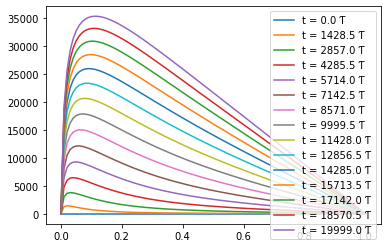

In [18]:
    matrix, X = solve()
    show(matrix, 15)

### Задание №3 (Задача 4)

**Промоделировать нестационарные процессы теплопроводности в зависимости от входных данных задачи:**

$$\begin{cases} 
   \frac {du}{dt}= k(x) \cdot \frac {d^2u}{dx^2}) + f(x, t), 0 < t \leq T\\
   u(a, t) = g_1(t), u(b, t) = g_2(t), 0 < t \leq T\\
   u(x, 0) = \varphi(x), a \leq x \leq b
\end{cases}$$  

##### Исходные данные для задачи

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt


a, b = 0, 2
h = (b - a) / 100
Te = 0.2
tau = 0.00005
size = b - a

# Можно заменить на константы
k = lambda x: 1
f = lambda x, t: x
fi = lambda x: 0
g1 = lambda t: 0
g2 = lambda t: 0

##### Функция для составления разностной схемы и решения уравнения:

In [20]:
def solve():
    X = np.linspace(a, b, int(size / h))
    T = np.linspace(0, Te, int(Te / tau))
    matrix = np.zeros((T.shape[0], X.shape[0]), dtype=np.float)

    for x_j, x in enumerate(X):
        matrix[0][x_j] = fi(x)

    for t_index, t in enumerate(T):
        matrix[t_index][a] = g1(t)
        matrix[t_index][b] = g2(t)

    for i in range(1, len(T)):
        for j in range(1, len(X) - 1):
            matrix[i][j] = tau * k(X[j]) * (matrix[i-1][j-1] - 2 * matrix[i-1][j] + matrix[i-1][j+1]) / h ** 2 +\
                           matrix[i-1][j] + f(X[j], T[i-1])

    return matrix, X

##### Функция для вывода результата:

In [21]:
def show(matrix, count=25):
    x_list = np.linspace(a, b, int(size/h))
    y_list = np.linspace(0, int(Te/tau) - 1, count)
    for y in y_list:
        plt.plot(x_list, matrix[int(y)], label="t = {0} Ƭ".format(y))
    plt.legend()
    plt.show()

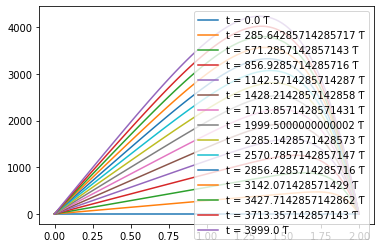

In [22]:
    matrix, X = solve()
    show(matrix, 15)